error = 38.8113253569


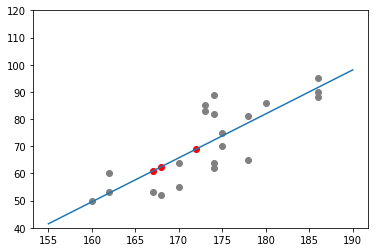

error = 36.1972846472


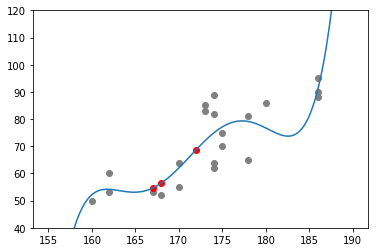

error = 27.6812210713


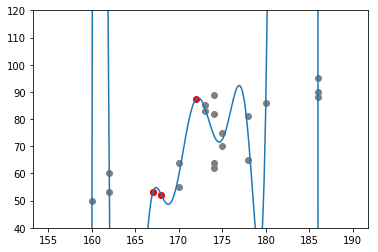

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

data = np.loadtxt('whData.dat', dtype=np.object, comments='#', delimiter=None)
# read height and weight data into 2D array (i.e. into a matrix)

y = data[:, 0].astype(np.float) # heights (no outliers)
x = data[:, 1].astype(np.float) # weights (some outliers)

# filter outliers
outliers = x[y < 0]
x = x[y>=0]
y = y[y>=0]
#x = np.matrix(x[y >= 0])
#y = np.matrix(y[y >= 0])

#x.shape = (x.size,1)
#y.shape = (x.size,1)


def get_vandermonde(x_vals, dim):
    return np.matrix(np.hstack([np.power(x_vals,k) for k in reversed(range(dim+1))]))


def fit_polynomial(x_vals, y_vals, outliers, dim):
    # construct Vandermonde matrix
    
    mu = np.mean(x_vals)
    sigma = 1#np.std(x_vals)
    
    #a_mat = get_vandermonde((x_vals-mu)/sigma,dim)
    #pinv = np.linalg.pinv(a_mat)
    #coeffs = np.dot(pinv,y_vals)
    coeffs = np.polyfit((x_vals-mu)/sigma,y_vals,dim)
    
    t = np.linspace(155,190,200)
    values = np.polyval(coeffs,(t-mu)/sigma)
    plt.plot(t,values, 'tab:blue')
    
    print("error =",np.linalg.norm(np.polyval(coeffs, (x_vals-mu)/sigma)-y_vals))
    #print("error =",np.linalg.norm(np.dot(a_mat,coeffs)-y_vals))
    plt.scatter(x,y,color='grey')
    #plt.scatter(x.getA(),y.getA(),color='grey')
    
    plt.scatter(outliers, np.polyval(coeffs, (outliers-mu)/sigma), c='red')
    
    plt.ylim(40,120)
    plt.savefig("poly"+str(dim)+"plot.pdf",dpi=200)
    plt.show()
    return coeffs
    
    
poly_1_coeffs = fit_polynomial(x,y,outliers,1)
poly_5_coeffs = fit_polynomial(x,y,outliers,5)
poly_10_coeffs = fit_polynomial(x,y,outliers,10)

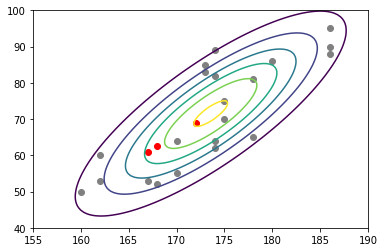

In [90]:
# bi-variate gaussian
mean_h = np.mean(x)
mean_w = np.mean(y)

#var_w = np.var(x,ddof=1)
#var_h = np.var(y,ddof=1)

cov_mat = np.cov(np.vstack((x.T,y.T)))

t_x = np.linspace(155,190,100)
t_y = np.linspace(40,100,100)
grid_x, grid_y = np.meshgrid(t_x,t_y)

t_z = mlab.bivariate_normal(grid_x,grid_y,np.sqrt(cov_mat[0,0]),np.sqrt(cov_mat[1,1]),mean_h,mean_w,cov_mat[0,1])

plt.contour(t_x,t_y,t_z)
plt.scatter(x.getA(),y.getA(),color='grey')

# predict outliers
outliers_y = mean_w + cov_mat[0,1]/cov_mat[0,0]*(outliers-mean_h)
plt.scatter(outliers,outliers_y,color='red')

plt.show()

error = 38.3074737685


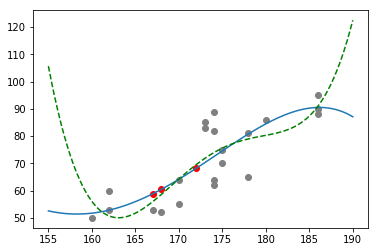

In [97]:
a_mat = get_vandermonde(x,6)
map_mat = (a_mat.T*a_mat+cov_mat[1,1]/3*np.eye(a_mat.shape[1])).I*a_mat.T
params = map_mat*y

plt.scatter(x.getA(),y.getA(), color='grey')
plt.plot(t_x,np.polyval(params,t_x))
plt.plot(t_x,np.polyval(poly_5_coeffs, t_x),"g--")
plt.plot()

print("error =",np.linalg.norm(np.dot(a_mat,params)-y))

#print(map_mat)
plt.scatter(outliers, np.polyval(params,outliers), color='red')
plt.show()